In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('../experiment_results/Topology_size_full_18.06/results.csv')
dfhh = pd.read_csv('../experiment_results/Topology_size_hh_15.06/results.csv')
df_combined = pd.concat([df, dfhh], ignore_index=True)

In [24]:
df = df_combined

In [25]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,300,bacon,bposd,17,17,1000,constant,0.002,0.002,NaN,NaN,NaN
1,custom_full,350,bacon,bposd,17,17,1000,constant,0.002,0.001,NaN,NaN,NaN
2,custom_full,300,bacon,bposd,17,17,1000,modsi1000,0.002,0.014,NaN,NaN,NaN
3,custom_full,400,bacon,bposd,19,19,1000,constant,0.002,0.001,NaN,NaN,NaN
4,custom_full,350,bacon,bposd,17,17,1000,modsi1000,0.002,0.015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.008,0.497,NaN,NaN,NaN
338,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.002,0.485,NaN,NaN,NaN
339,custom_heavyhex,546,color,bposd,13,13,1000,constant,0.004,0.501,NaN,NaN,NaN
340,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.004,0.494,NaN,NaN,NaN


In [26]:
import matplotlib.pyplot as plt

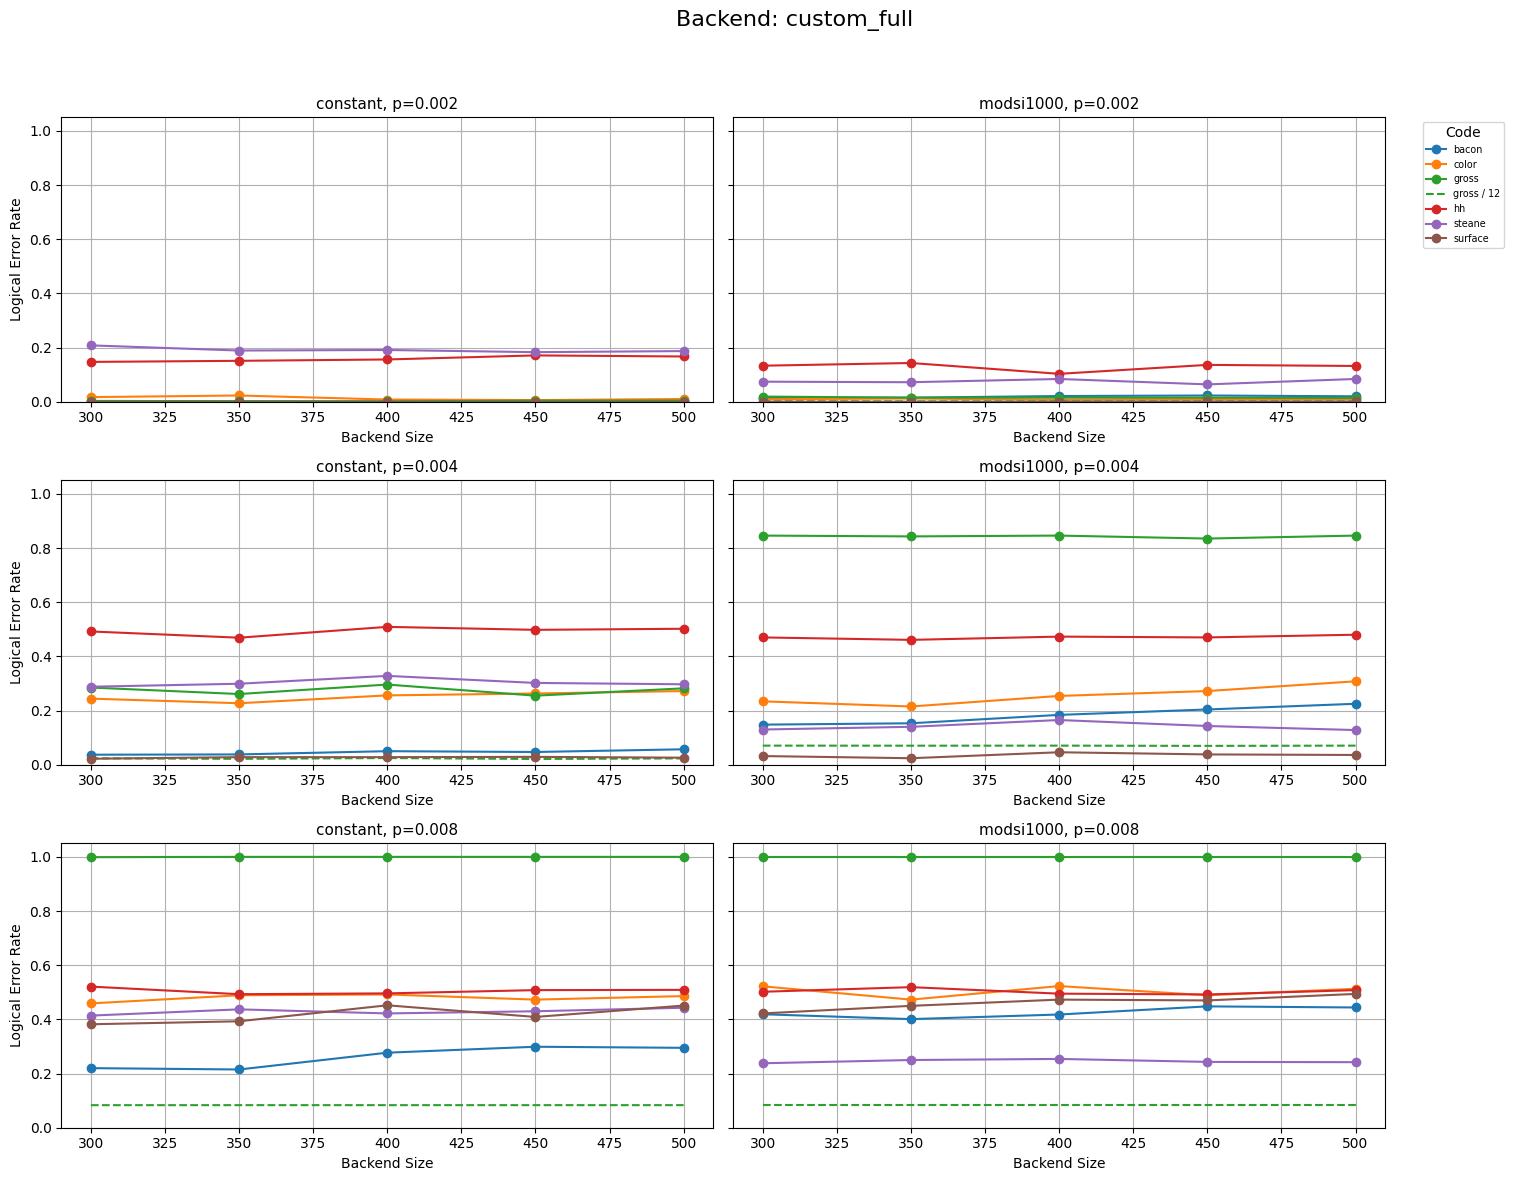

In [27]:
import matplotlib.pyplot as plt

# Error types and probabilities to show
error_types = ['constant', 'modsi1000']
error_probs = [0.002, 0.004, 0.008]

# Filter out heavyhex codes
df_filtered = df[~df['code'].str.contains('heavyhex', case=False, na=False)]
df_filtered = df_filtered[~df_filtered['backend'].str.contains('heavyhex', case=False, na=False)]


# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    fig, axes = plt.subplots(len(error_probs), len(error_types), figsize=(16, 12), sharey=True)

    fig.suptitle(f'Backend: {backend}', fontsize=16)

    for i, p in enumerate(error_probs):  # rows = error probabilities
        for j, et in enumerate(error_types):  # columns = error types
            ax = axes[i][j]
            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                group_sorted = group.sort_values('backend_size')

                # Plot gross line normally
                if code == 'gross':
                    line = ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                                   label=code, marker='o')
                    line_color = line[0].get_color()

                    # Dashed gross/12 line
                    gross_div12 = group_sorted['logical_error_rate'] / 12
                    ax.plot(group_sorted['backend_size'], gross_div12,
                            linestyle='--', color=line_color, label='gross / 12')
                else:
                    ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                            label=code, marker='o')

            # Titles and labels
            ax.set_title(f'{et}, p={p}', fontsize=11)
            ax.set_xlabel('Backend Size')
            if j == 0:
                ax.set_ylabel('Logical Error Rate')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            # Add legend only once
            if i == 0 and j == 1:
                ax.legend(title='Code', fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.savefig(f"../data/size/full.png")
    plt.show()




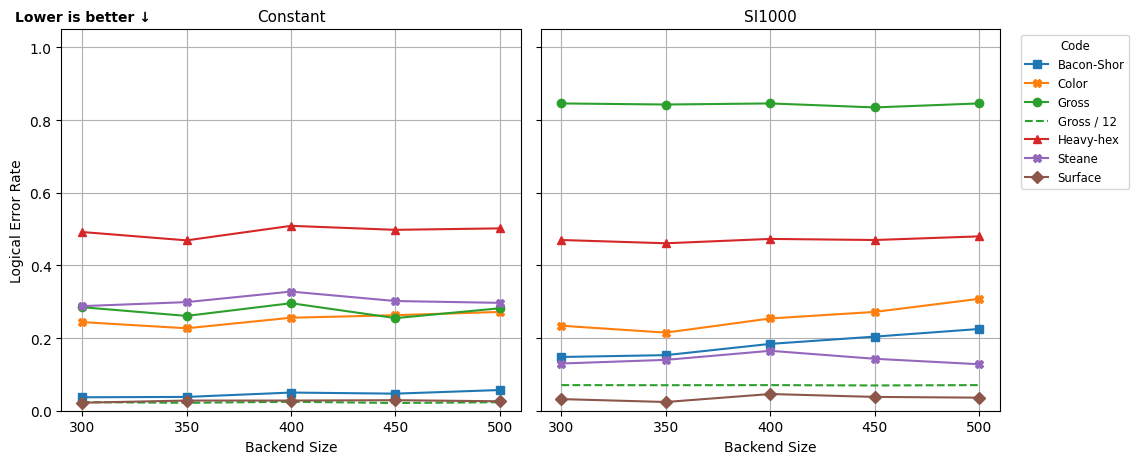

In [28]:
import matplotlib.pyplot as plt

# Error types and probabilities to show (with renamed labels)
error_types = ['Constant', 'SI1000']
error_probs = [0.004]

# Filter out heavyhex codes
df_filtered = df[~df['code'].str.contains('heavyhex', case=False, na=False)]
df_filtered = df_filtered[~df_filtered['backend'].str.contains('heavyhex', case=False, na=False)]

# Rename map for code labels
code_rename_map = {
    'bacon': 'Bacon-Shor',
    'hh': 'Heavy-hex',
    'gross': 'Gross'
}

# Rename map for error types (display name -> internal name in DataFrame)
error_type_map = {
    'Constant': 'constant',
    'SI1000': 'modsi1000'
}

# Marker styles for different codes
marker_styles = {
    'gross': 'o',
    'bacon': 's',      # square
    'hh': '^',         # triangle up
    'surface': 'D',    # diamond
    'other': 'X'       # fallback marker
}

# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    n_rows = 1
    n_cols = len(error_probs) * len(error_types)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5), sharey=True)

    if n_cols == 1:
        axes = [axes]

    all_handles_labels = []

    for idx, (i, p) in enumerate(enumerate(error_probs)):
        for j, et in enumerate(error_types):
            ax = axes[idx * len(error_types) + j]
            original_et = error_type_map.get(et, et.lower())

            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == original_et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                code_key = code.lower()
                code_display = code_rename_map.get(code_key, code.capitalize())
                marker = marker_styles.get(code_key, marker_styles['other'])

                group_sorted = group.sort_values('backend_size')

                line = ax.plot(
                    group_sorted['backend_size'],
                    group_sorted['logical_error_rate'],
                    label=code_display,
                    marker=marker
                )

                if code_key == 'gross':
                    line_color = line[0].get_color()
                    gross_div12 = group_sorted['logical_error_rate'] / 12
                    ax.plot(
                        group_sorted['backend_size'],
                        gross_div12,
                        linestyle='--',
                        color=line_color,
                        label='Gross / 12'
                    )

            ax.set_xlabel('Backend Size')
            xticks = sorted(subset['backend_size'].unique())
            ax.set_xticks(xticks)

            ax.set_title(f'{et}', fontsize=11)

            if idx == 0 and j == 0:
                ax.set_ylabel('Logical Error Rate')
                ax.text(-0.1, 1.05, 'Lower is better ↓', transform=ax.transAxes,
                        fontsize=10, fontweight='bold', va='top', ha='left')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            # Collect legend info
            handles, labels = ax.get_legend_handles_labels()
            all_handles_labels.extend(zip(handles, labels))

    # Deduplicate legend entries
    unique_labels = {}
    for h, l in all_handles_labels:
        if l not in unique_labels:
            unique_labels[l] = h

    fig.legend(
        handles=list(unique_labels.values()),
        labels=list(unique_labels.keys()),
        title='Code',
        fontsize='small',
        title_fontsize='small',
        loc='upper right',
        bbox_to_anchor=(0.95, 0.88)
    )

    plt.tight_layout(rect=[0, 0, 0.85, 0.95])  # leave space for legend
    plt.savefig(f"../data/size/full.png")
    plt.show()


In [29]:
df = pd.read_csv('../experiment_results/Topology_size_full_18.06/results.csv')
dfhh = pd.read_csv('../experiment_results/Topology_size_hh_15.06/results.csv')
df_combined = pd.concat([df, dfhh], ignore_index=True)

In [30]:
dfhh

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_heavyhex,114,bacon,bposd,7,7,1000,constant,0.002,0.021,NaN,NaN,NaN
1,custom_heavyhex,114,bacon,bposd,7,7,1000,modsi1000,0.002,0.036,NaN,NaN,NaN
2,custom_heavyhex,114,bacon,bposd,7,7,1000,constant,0.004,0.094,NaN,NaN,NaN
3,custom_heavyhex,114,bacon,bposd,7,7,1000,modsi1000,0.004,0.152,NaN,NaN,NaN
4,custom_heavyhex,114,bacon,bposd,7,7,1000,modsi1000,0.008,0.358,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.008,0.497,NaN,NaN,NaN
158,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.002,0.485,NaN,NaN,NaN
159,custom_heavyhex,546,color,bposd,13,13,1000,constant,0.004,0.501,NaN,NaN,NaN
160,custom_heavyhex,546,color,bposd,13,13,1000,modsi1000,0.004,0.494,NaN,NaN,NaN


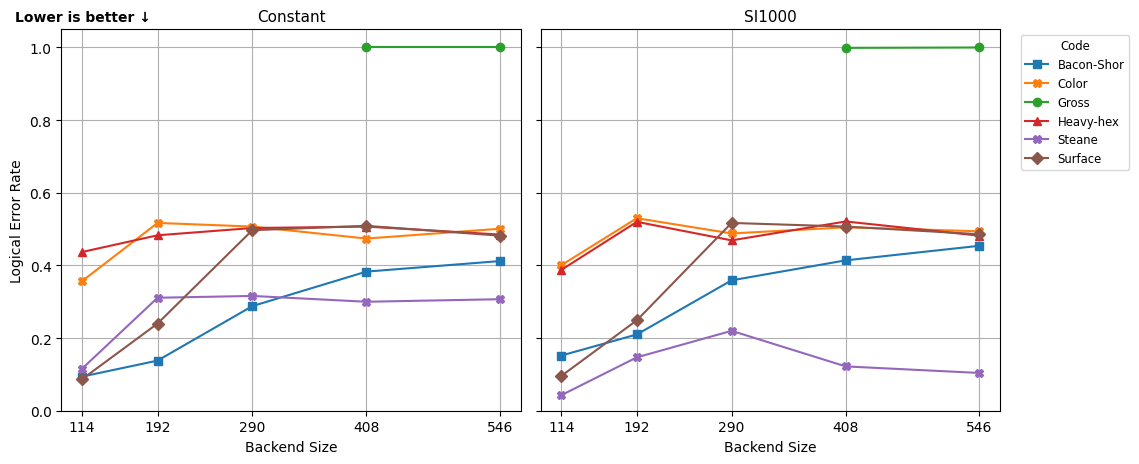

In [31]:
import matplotlib.pyplot as plt

# Error types and probabilities to show (with renamed labels)
error_types = ['Constant', 'SI1000']
error_probs = [0.004]

# Filter out full connectivity codes
df_filtered = dfhh

# Rename map for code labels
code_rename_map = {
    'bacon': 'Bacon-Shor',
    'hh': 'Heavy-hex',
    'gross': 'Gross'
}

# Rename map for error types (display name -> internal name in DataFrame)
error_type_map = {
    'Constant': 'constant',
    'SI1000': 'modsi1000'
}

# Marker styles for different codes
marker_styles = {
    'gross': 'o',
    'bacon': 's',
    'hh': '^',
    'surface': 'D',
    'other': 'X'
}

# Get unique backends
backends = df_filtered['backend'].unique()

for backend in backends:
    n_rows = 1
    n_cols = len(error_probs) * len(error_types)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5), sharey=True)

    # Normalize axes to flat list
    if isinstance(axes, plt.Axes):  # Single plot
        axes = [axes]
    else:
        axes = axes.flatten()

    all_handles_labels = []

    for idx, (i, p) in enumerate(enumerate(error_probs)):
        for j, et in enumerate(error_types):
            ax = axes[idx * len(error_types) + j]

            original_et = error_type_map.get(et, et.lower())

            subset = df_filtered[
                (df_filtered['backend'] == backend) &
                (df_filtered['error_type'] == original_et) &
                (df_filtered['error_probability'] == p)
            ]

            for code, group in subset.groupby('code'):
                code_key = code.lower()
                code_display = code_rename_map.get(code_key, code.capitalize())
                marker = marker_styles.get(code_key, marker_styles['other'])

                group_sorted = group.sort_values('backend_size')

                ax.plot(
                    group_sorted['backend_size'],
                    group_sorted['logical_error_rate'],
                    label=code_display,
                    marker=marker
                )

            ax.set_xlabel('Backend Size')
            xticks = sorted(subset['backend_size'].unique())
            ax.set_xticks(xticks)

            ax.set_title(f'{et}', fontsize=11)

            if idx == 0 and j == 0:
                ax.set_ylabel('Logical Error Rate')
                ax.text(-0.1, 1.05, 'Lower is better ↓', transform=ax.transAxes,
                        fontsize=10, fontweight='bold', va='top', ha='left')

            ax.grid(True)
            ax.set_ylim(0, 1.05)

            handles, labels = ax.get_legend_handles_labels()
            all_handles_labels.extend(zip(handles, labels))

    # Deduplicate legend entries
    unique_labels = {}
    for h, l in all_handles_labels:
        if l not in unique_labels:
            unique_labels[l] = h

    fig.legend(
        handles=list(unique_labels.values()),
        labels=list(unique_labels.keys()),
        title='Code',
        fontsize='small',
        title_fontsize='small',
        loc='upper right',
        bbox_to_anchor=(0.95, 0.88)
    )

    plt.tight_layout(rect=[0, 0, 0.85, 0.95])
    plt.savefig(f"../data/size/hh.png")
    plt.show()


/tmp/ipykernel_4298/1435232864.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_4298/1435232864.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_4298/1435232864.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', fontsize='x-small')
/tmp/ipykernel_4298/1435232864.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Code', font

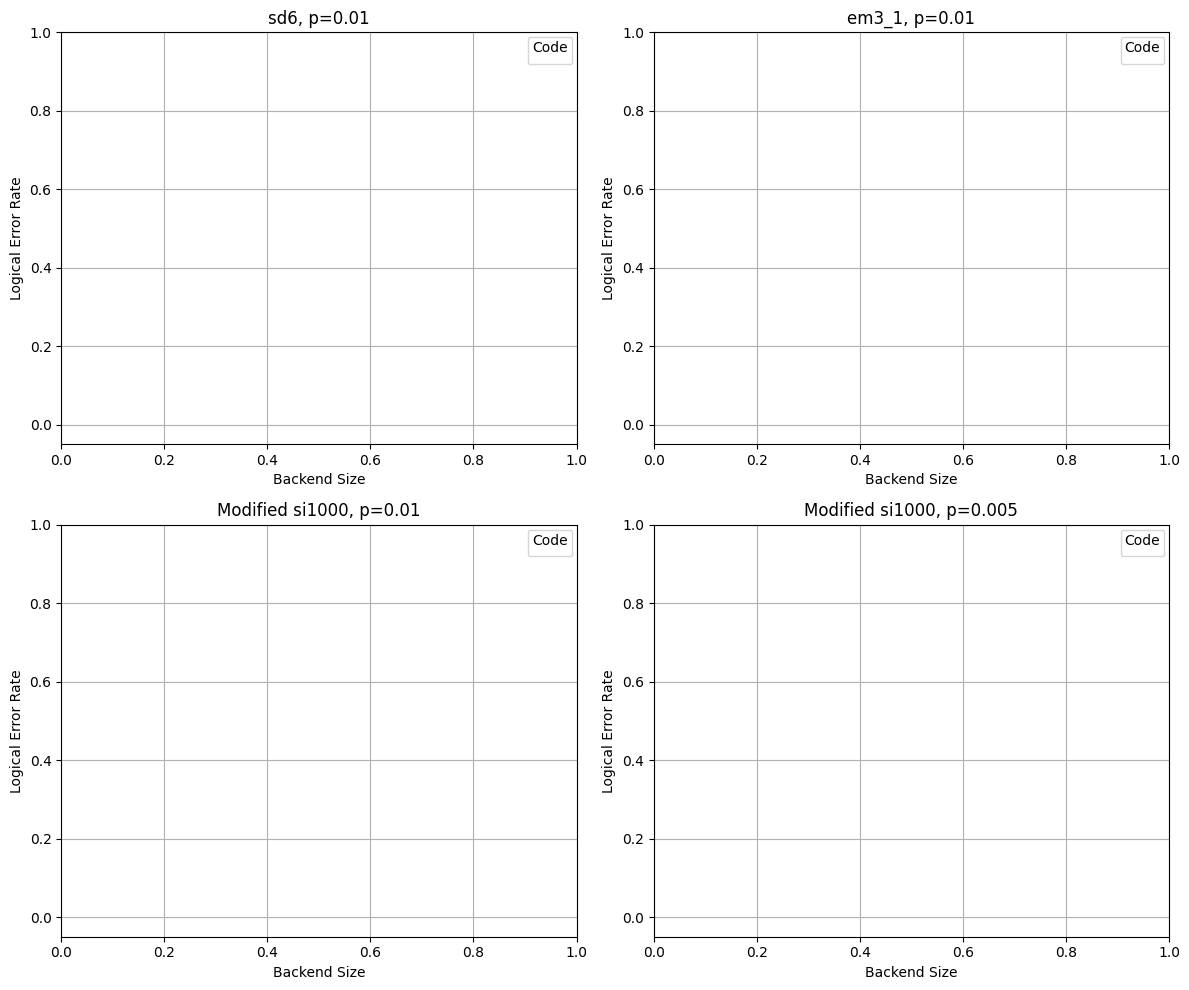

In [32]:
import matplotlib.pyplot as plt

# Define combinations of error type and error probability
plot_params = [
    ('sd6', 0.01),
    ('em3_1', 0.01),
    ('si1000', 0.01),
    ('si1000', 0.005)
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index subplots

for idx, (et, p) in enumerate(plot_params):
    ax = axes[idx]
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    for code, group in subset.groupby('code'):
        group_sorted = group.sort_values('backend_size')
        ax.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'],
                label=code, marker='o')
    if et == "si1000":
        et = "Modified si1000"
    ax.set_title(f'{et}, p={p}', fontsize=12)
    ax.set_xlabel('Backend Size')
    ax.set_ylabel('Logical Error Rate')
    ax.grid(True)
    ax.legend(title='Code', fontsize='x-small')
    ax.set_ylim(bottom=-0.05)

# Overall formatting
plt.tight_layout()
# plt.savefig("../data/Topology_size_27.05/mod_si_four_plots.png")
plt.show()


In [33]:
df = pd.read_csv('../experiment_results/Topology_connectivity_31.05_20:45/results.csv')
print(df)
print("Total number of rows:", len(df))

         backend  backend_size   code decoder  distance  cycles  num_samples  \
0    custom_cube           729  gross   bposd       256       3         1000   
1    custom_cube           729  gross   bposd       256       3         1000   
2    custom_grid           729  gross   bposd       364       3         1000   
3    custom_cube           729  gross   bposd       256       3         1000   
4    custom_cube           729  gross   bposd       256       3         1000   
..           ...           ...    ...     ...       ...     ...          ...   
211  custom_line           729  color   bposd        17       3         1000   
212  custom_line           729  color   bposd        17       3         1000   
213  custom_grid           729  color   bposd        17       3         1000   
214  custom_grid           729  color   bposd        17       3         1000   
215  custom_grid           729  color   bposd        17       3         1000   

    error_type  error_probability  logi

In [34]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_cube,729,gross,bposd,256,3,1000,em3_2,0.010,0.000,NaN,NaN,NaN
1,custom_cube,729,gross,bposd,256,3,1000,em3_2,0.015,0.000,NaN,NaN,NaN
2,custom_grid,729,gross,bposd,364,3,1000,em3_2,0.015,0.000,NaN,NaN,NaN
3,custom_cube,729,gross,bposd,256,3,1000,em3_1,0.010,0.000,NaN,NaN,NaN
4,custom_cube,729,gross,bposd,256,3,1000,em3_1,0.015,0.010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,custom_line,729,color,bposd,17,3,1000,sd6,0.015,0.497,NaN,NaN,NaN
212,custom_line,729,color,bposd,17,3,1000,sd6,0.050,0.476,NaN,NaN,NaN
213,custom_grid,729,color,bposd,17,3,1000,sd6,0.010,0.392,NaN,NaN,NaN
214,custom_grid,729,color,bposd,17,3,1000,sd6,0.015,0.516,NaN,NaN,NaN


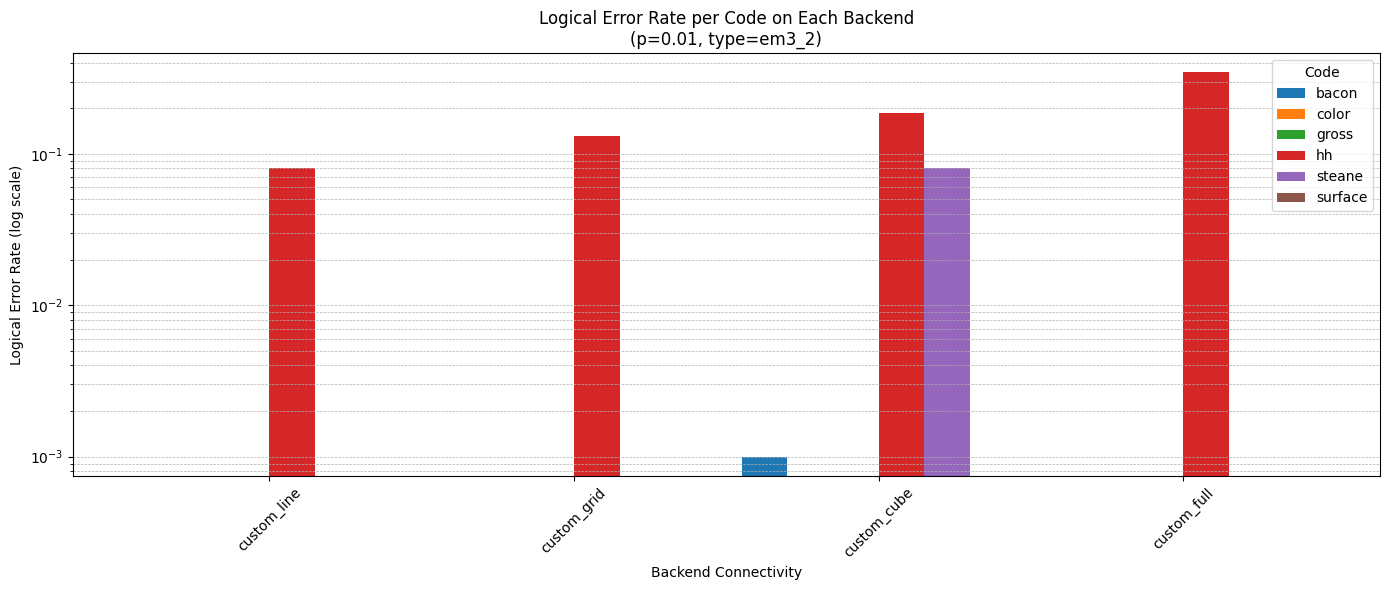

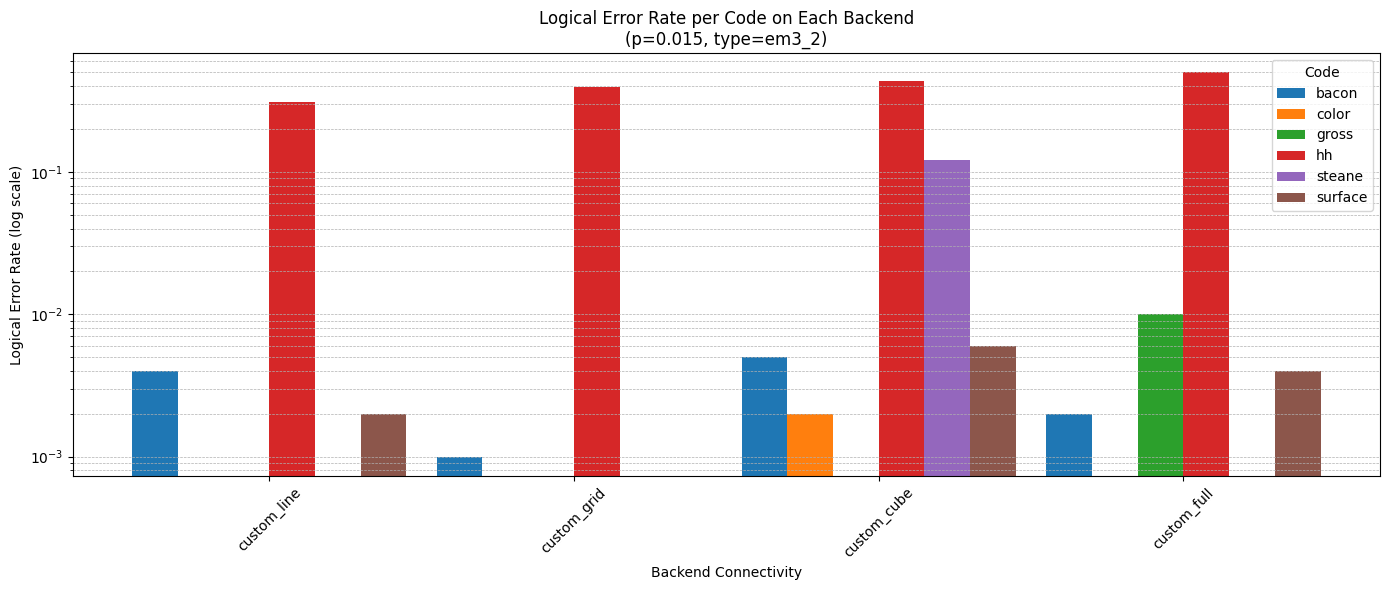

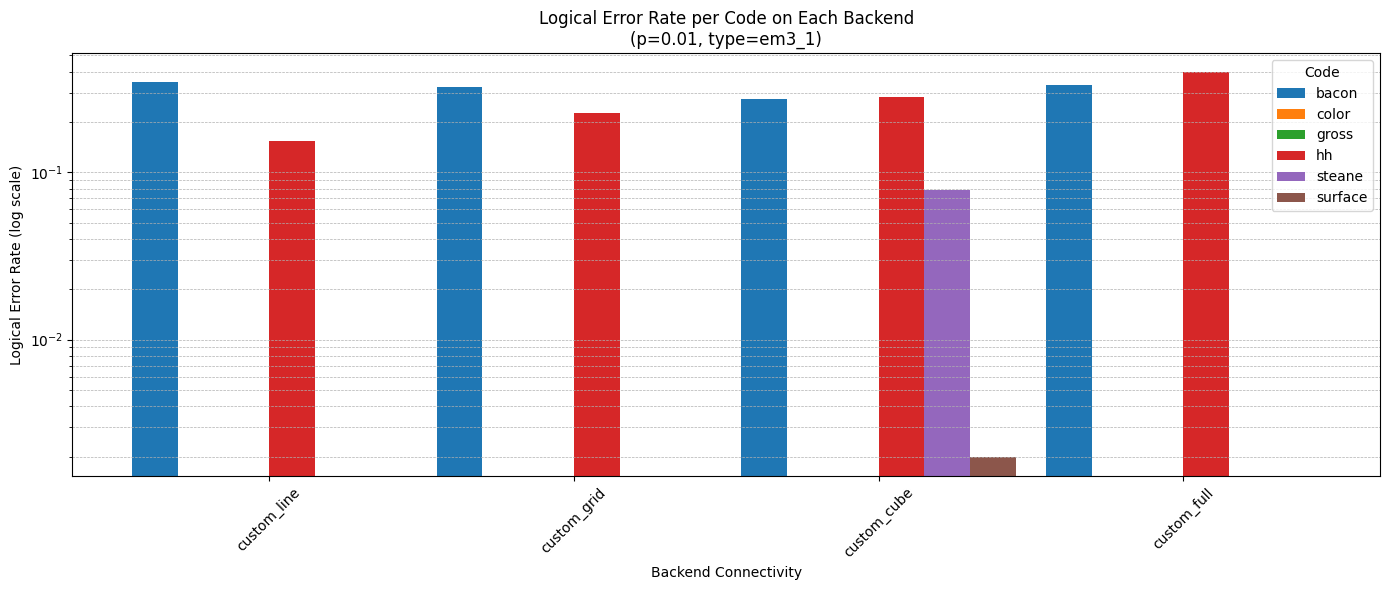

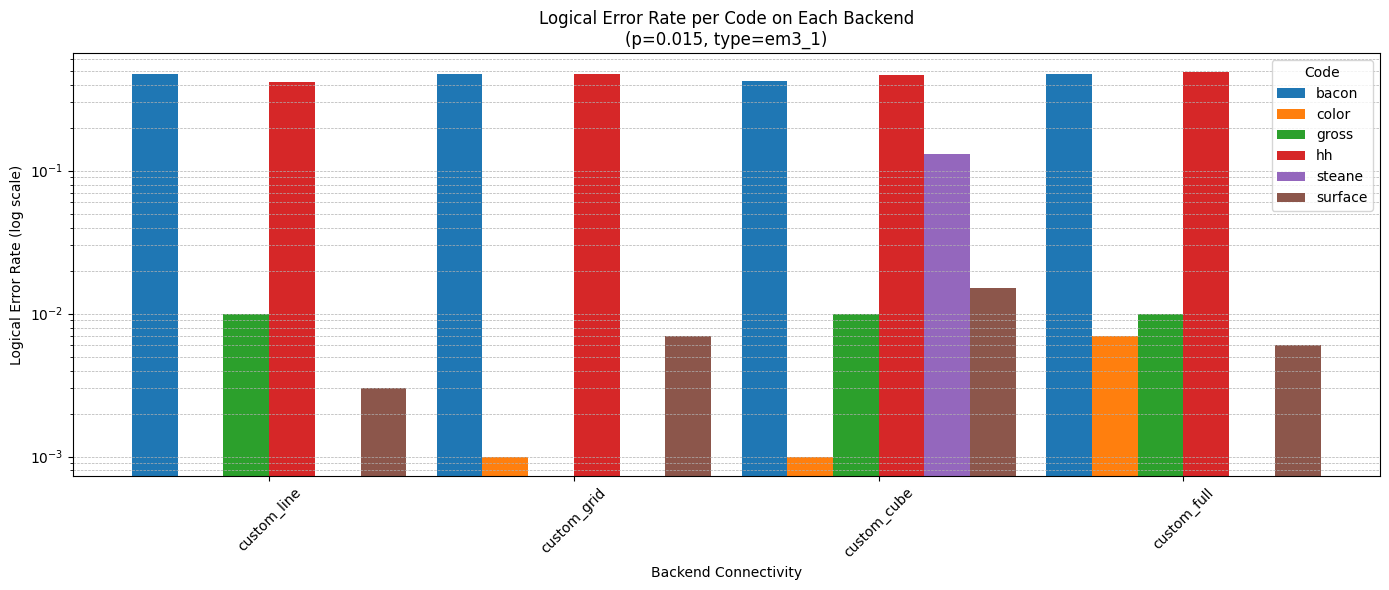

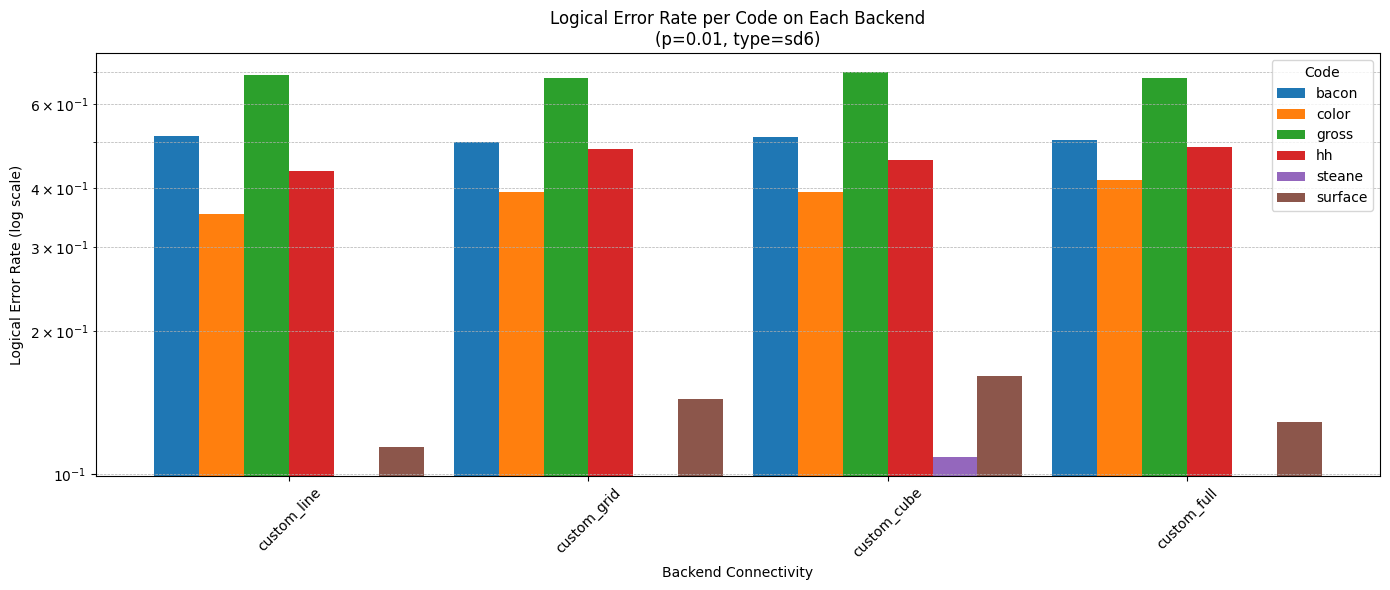

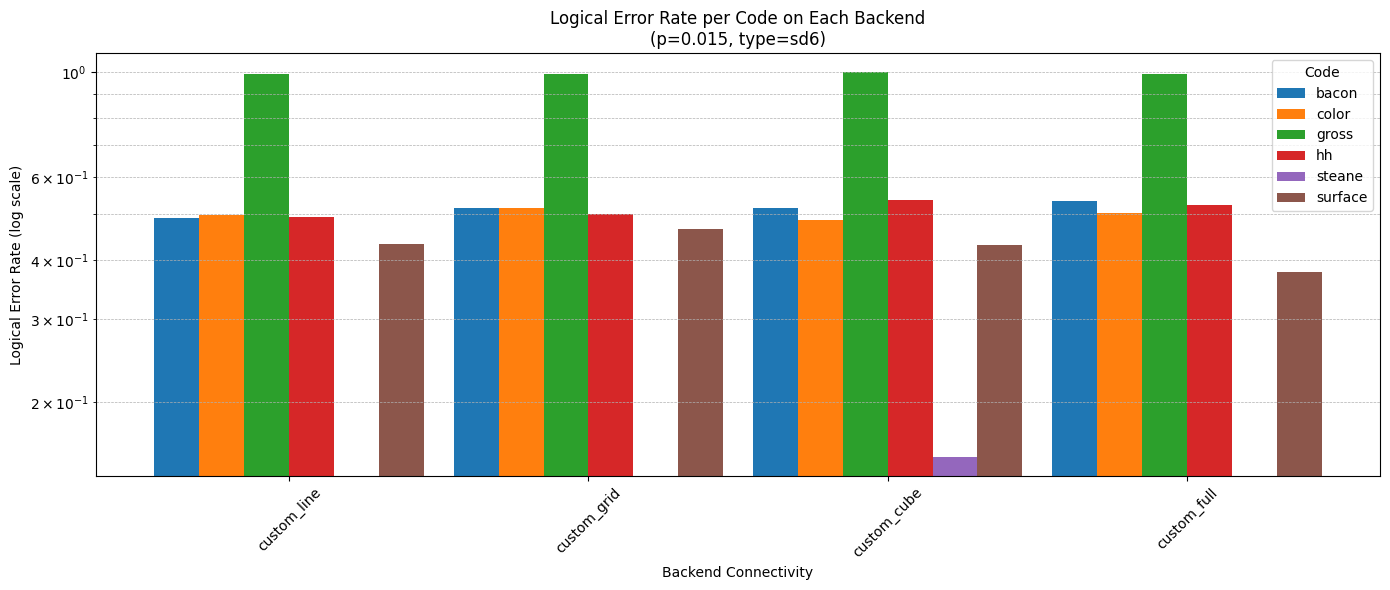

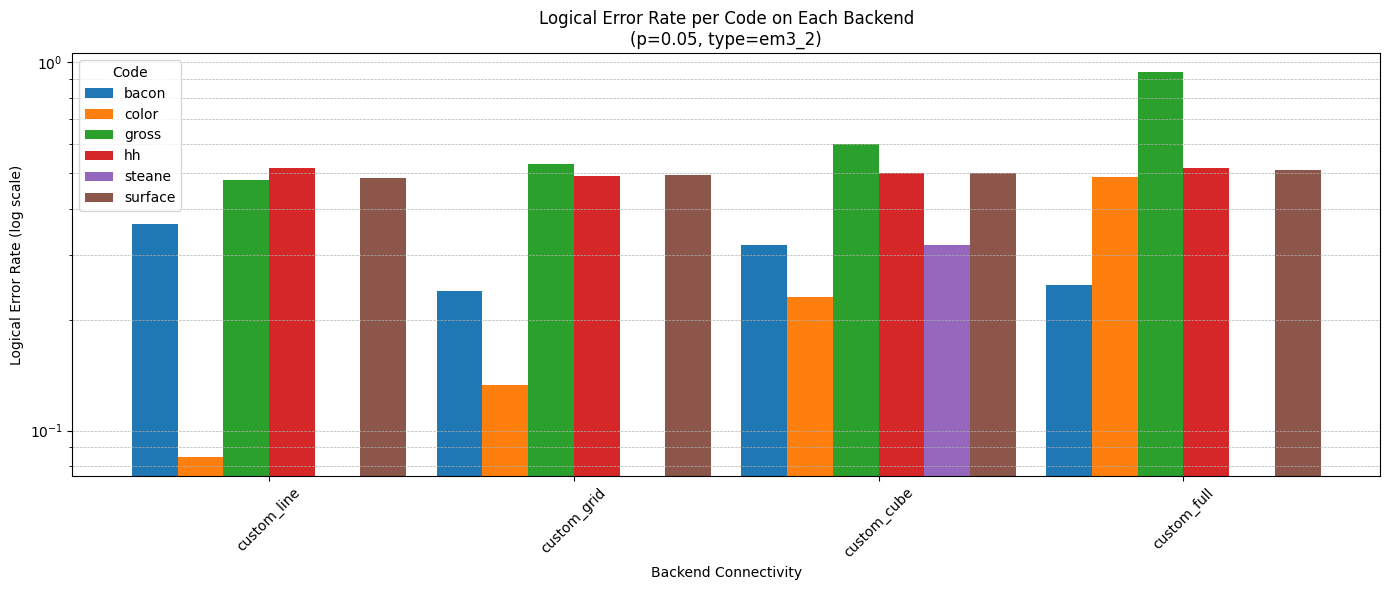

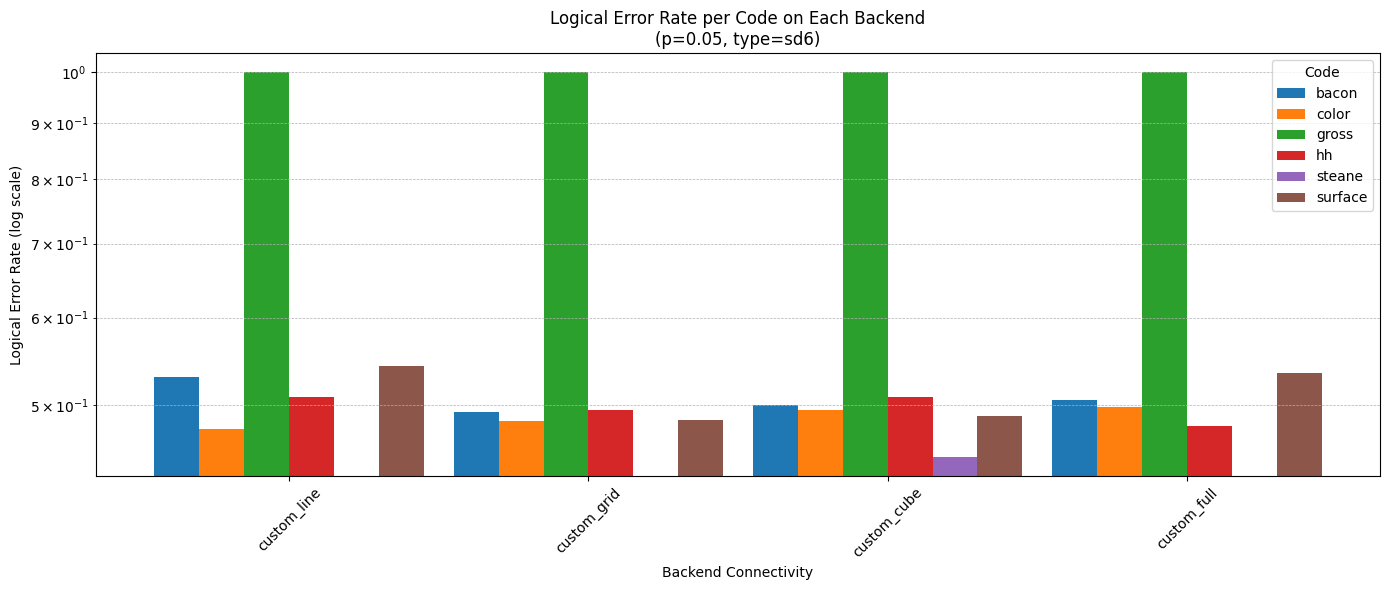

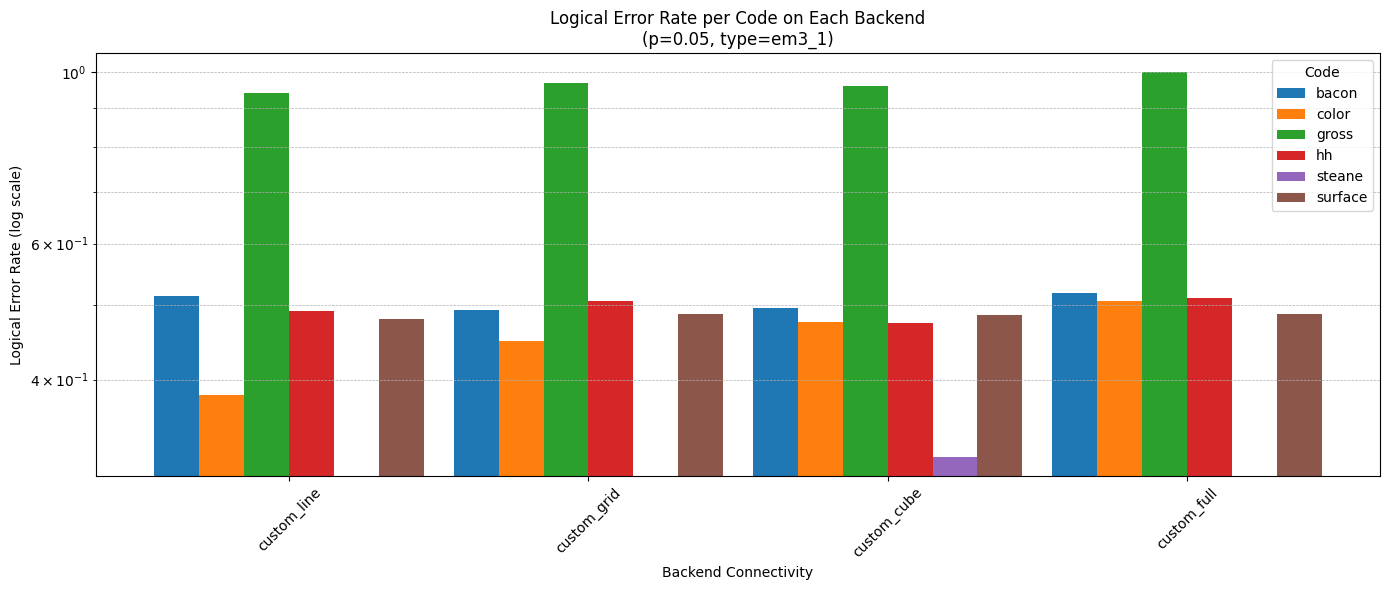

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom backend order
custom_order = ['custom_line', 'custom_grid', 'custom_cube', 'custom_full']

# Get all unique combinations of error_probability and error_type
combinations = df[['error_probability', 'error_type']].drop_duplicates()

# Loop through each combination
for _, row in combinations.iterrows():
    p = row['error_probability']
    et = row['error_type']

    # Filter the subset
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

    # Create pivot table and reindex
    pivot_df = subset.pivot_table(index='backend', columns='code', values='logical_error_rate', aggfunc='mean')
    pivot_df = pivot_df.reindex(custom_order)

    # Skip empty or invalid plots
    if pivot_df.dropna(how='all').empty:
        continue

    # Prepare plot data
    backends = pivot_df.index
    codes = pivot_df.columns
    x = np.arange(len(backends))
    width = 0.15

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, code in enumerate(codes):
        ax.bar(x + i * width, pivot_df[code], width, label=code)

    # Formatting
    ax.set_yscale('log')  # Logarithmic scale for error rate
    ax.set_xlabel('Backend Connectivity')
    ax.set_ylabel('Logical Error Rate (log scale)')
    ax.set_title(f'Logical Error Rate per Code on Each Backend\n(p={p}, type={et})')
    ax.set_xticks(x + width * (len(codes) - 1) / 2)
    ax.set_xticklabels(backends, rotation=45)
    ax.legend(title='Code')
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    # Optional: save to file
    # plt.savefig(f"barplot_{et}_p{str(p).replace('.', '')}.png")
    plt.show()


In [36]:
import pandas as pd
df_decoders = pd.read_csv("../experiment_results/test_decoders/results.csv")

In [37]:
df_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
5,bacon,bposd_faster,0.040
11,bacon,bposd_gross,0.043
16,color,bposd_gross,0.249
4,color,mwpm,0.504
10,color,bposd_faster,0.296
13,gross,bposd_gross,0.269
7,gross,bposd_faster,0.304
14,hh,bposd_gross,0.447
8,hh,bposd_faster,0.462


In [38]:
best_decoders = df_decoders.loc[df_decoders.groupby("code")["logical_error_rate"].idxmin()]
best_decoders = best_decoders[["code", "decoder", "logical_error_rate"]].sort_values(by="code")
display(best_decoders)

,code,decoder,logical_error_rate
1,bacon,mwpm,0.039
16,color,bposd_gross,0.249
13,gross,bposd_gross,0.269
14,hh,bposd_gross,0.447
12,steane,bposd_gross,0.124
15,surface,bposd_gross,0.021


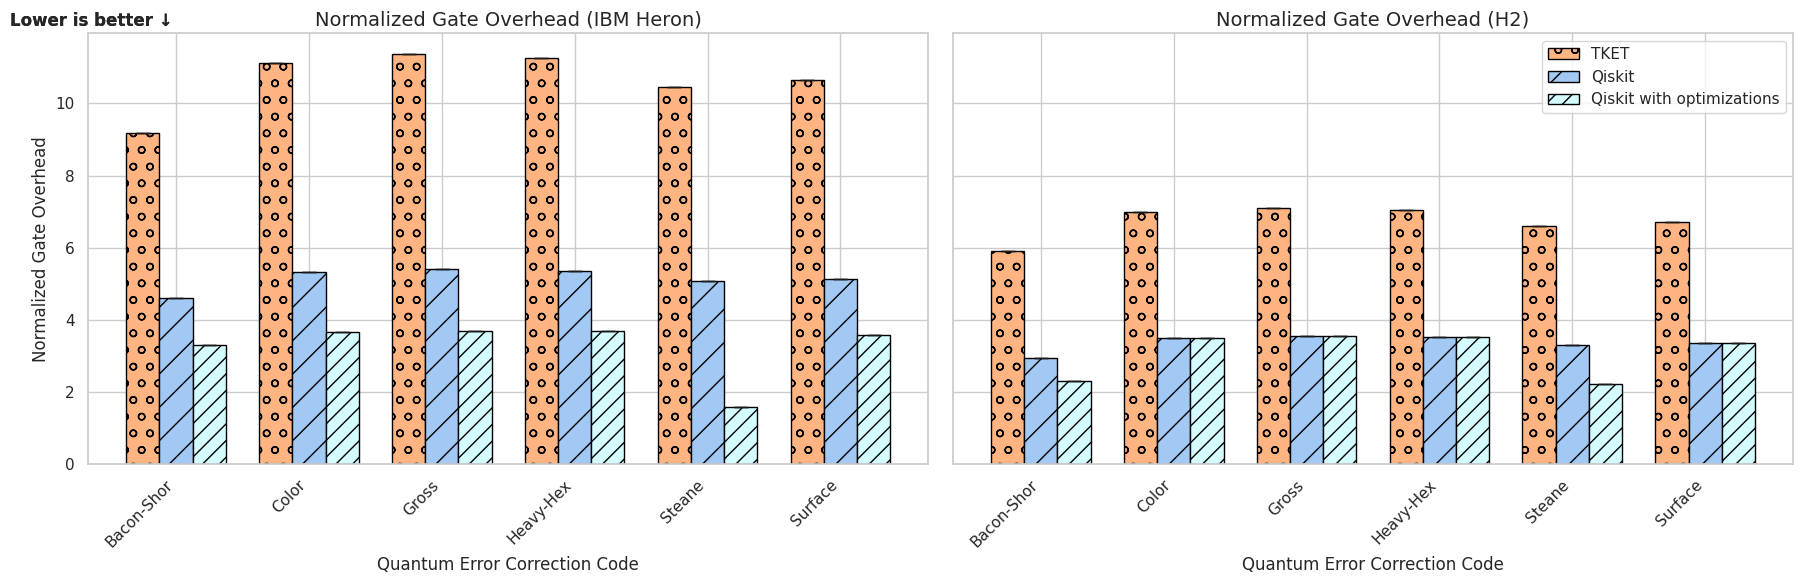

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load original data
df = pd.read_csv("../experiment_results/Translation_full/results.csv")

# Method name formatting
method_label_map = {
    "tket": "TKET",
    "qiskit": "Qiskit",
    "qiskit_optimized": "Qiskit with optimizations",
}
df["translating_method"] = df["translating_method"].map(method_label_map)

# Gate sets to include
gate_sets = ["ibm_heron", "h2"]
translation_methods = ["TKET", "Qiskit", "Qiskit with optimizations"]
df = df[df["gate_set"].isin(gate_sets) & df["translating_method"].isin(translation_methods)]

# Format code names
def format_code(code):
    code = code.capitalize()
    if code == "Bacon":
        return "Bacon-Shor"
    elif code == "Hh":
        return "Heavy-Hex"
    return code

df["code"] = df["code"].apply(format_code)

# Normalize to original_total_gates
df["normalized_mean"] = df["gate_overhead_mean"] / df["original_total_gates"]
df["normalized_var"] = df["gate_overhead_var"] / (df["original_total_gates"] ** 2)

# Plot settings
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Set pastel palette base color
base_palette = sns.color_palette("pastel", n_colors=2)
qiskit_color = base_palette[0]
tket_color = base_palette[1]
optimized_qiskit_color = tuple(min(1, c + 0.2) for c in qiskit_color)

# Colors and hatches
color_map = {
    "TKET": tket_color,
    "Qiskit": qiskit_color,
    "Qiskit with optimizations": optimized_qiskit_color,
}
hatches = ["o", "/", "//"]  # different hatches per method

# Sort and format code labels
codes = sorted(df["code"].unique())
bar_width = 0.25
x = np.arange(len(codes))

for i, gate_set in enumerate(gate_sets):
    ax = axes[i]
    subset = df[df["gate_set"] == gate_set]

    # Pivot normalized values
    mean_pivot = subset.pivot_table(
        index="code",
        columns="translating_method",
        values="normalized_mean",
        aggfunc="mean",
    ).reindex(codes).reindex(columns=translation_methods, fill_value=0)

    var_pivot = subset.pivot_table(
        index="code",
        columns="translating_method",
        values="normalized_var",
        aggfunc="mean",
    ).reindex(codes).reindex(columns=translation_methods, fill_value=0)

    for j, method in enumerate(translation_methods):
        means = mean_pivot[method].values
        variances = var_pivot[method].values
        bars = ax.bar(
            x + j * bar_width,
            means,
            yerr=variances,
            capsize=5,
            width=bar_width,
            color=color_map[method],
            hatch=hatches[j % len(hatches)],
            edgecolor="black",
            label=method
        )

    ax.set_title(f"Normalized Gate Overhead ({'IBM Heron' if gate_set == 'ibm_heron' else 'H2'})", fontsize=14)
    ax.set_xlabel("Quantum Error Correction Code")
    axes[0].set_ylabel("Normalized Gate Overhead")
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(codes, rotation=45, ha="right")

    # Add "Lower is better ↓"
    ylim = ax.get_ylim()
    axes[0].text(
        -1,
        ylim[1] * 1.05,
        "Lower is better ↓",
        fontsize=12,
        fontweight="bold",
        verticalalignment="top",
        horizontalalignment="left"
    )

# Legend and layout
axes[1].legend()
plt.tight_layout()

# Uncomment to save
plt.savefig("../data/translation/translation.pdf", format='pdf')
plt.show()


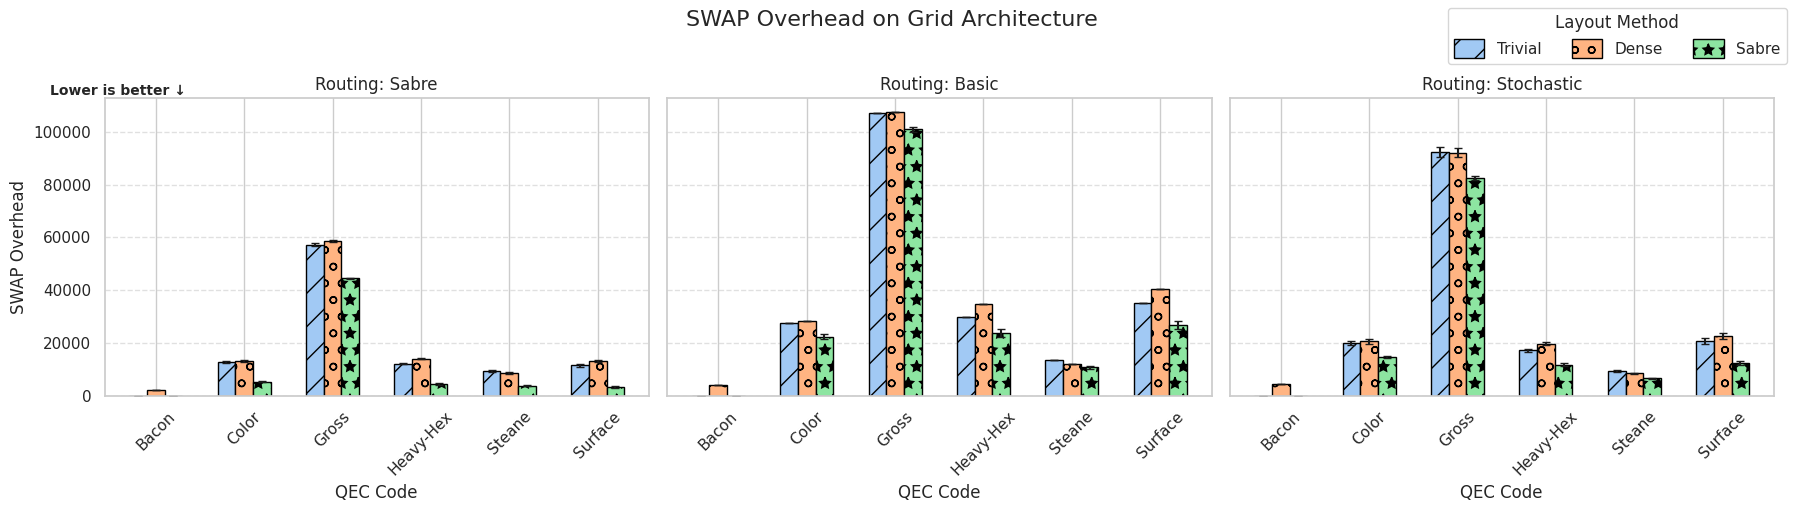

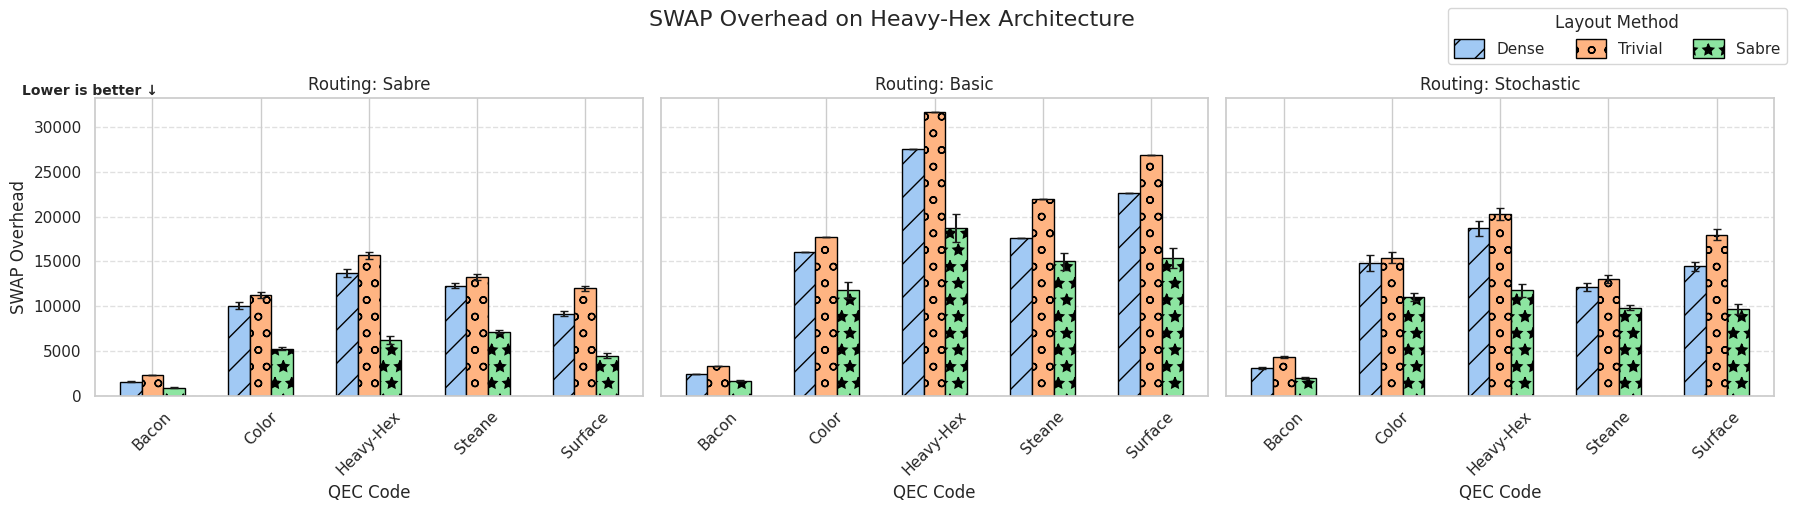

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def format_code(code):
    code = code.lower()
    return {
        "hh": "Heavy-Hex",
        "surface": "Surface",
        "color": "Color"
    }.get(code, code.capitalize())

def plot_faceted_overhead(df, backend_label, total_columns=3):
    df["code"] = df["code"].apply(format_code)
    
    routing_methods = df["routing_method"].dropna().unique()
    layout_methods = df["layout_method"].dropna().unique()
    codes = sorted(df["code"].unique())

    n_routing = len(routing_methods)
    n_cols = total_columns
    n_rows = int(np.ceil(n_routing / n_cols))

    plot_width_per_col = 6
    plot_height_per_row = 5

    bar_width = 0.2
    palette = sns.color_palette("pastel", n_colors=len(layout_methods))
    hatches = ['/', 'o', '*', '\\', '-']
    layout_styles = {
        layout: (palette[i % len(palette)], hatches[i % len(hatches)])
        for i, layout in enumerate(layout_methods)
    }

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(plot_width_per_col * n_cols, plot_height_per_row * n_rows), sharey=True)
    axes = axes.flatten()

    for i, routing in enumerate(routing_methods):
        ax = axes[i]
        subset = df[df["routing_method"] == routing]

        x = np.arange(len(codes))
        for j, layout in enumerate(layout_methods):
            values = []
            errors = []
            for code in codes:
                entry = subset[(subset["layout_method"] == layout) & (subset["code"] == code)]
                mean = entry["swap_overhead_mean"].values[0] if not entry.empty else 0
                var = entry["swap_overhead_var"].values[0] if not entry.empty else 0
                values.append(mean)
                errors.append(np.sqrt(var))

            ax.bar(
                x + j * bar_width,
                values,
                width=bar_width,
                label=layout.capitalize(),
                color=layout_styles[layout][0],
                edgecolor="black",
                hatch=layout_styles[layout][1],
                yerr=errors,
                capsize=3,
            )

        ax.set_title(f"Routing: {routing.capitalize()}")
        ax.set_xticks(x + (bar_width * (len(layout_methods) - 1)) / 2)
        ax.set_xticklabels(codes, rotation=45)
        ax.set_xlabel("QEC Code")
        if i % n_cols == 0:
            ax.set_ylabel("SWAP Overhead")

        # ✅ Add horizontal grid lines
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    ylim = axes[0].get_ylim()
    axes[0].text(
        -1,
        ylim[1] * 1.05,
        "Lower is better ↓",
        fontsize=10,
        fontweight="bold",
        verticalalignment="top",
        horizontalalignment="left"
    )

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    handles = [
        plt.Rectangle((0, 0), 1, 1,
                      facecolor=layout_styles[layout][0],
                      edgecolor='black',
                      hatch=layout_styles[layout][1])
        for layout in layout_methods
    ]
    labels = [layout.capitalize() for layout in layout_methods]
    fig.legend(handles, labels, title="Layout Method", loc="upper right", ncol=len(layout_methods),    handleheight=1.5 )

    fig.suptitle(f"SWAP Overhead on {backend_label} Architecture", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f"../data/routing/routing_{backend_label}.png",bbox_inches='tight')
    plt.show()

# Load and plot
df_grid = pd.read_csv("../experiment_results/Routing_grid_30.06/results.csv")
df_hh = pd.read_csv("../experiment_results/Routing_hh_30.06/results.csv")

plot_faceted_overhead(df_grid, "Grid")
plot_faceted_overhead(df_hh, "Heavy-Hex")


# Plot variance

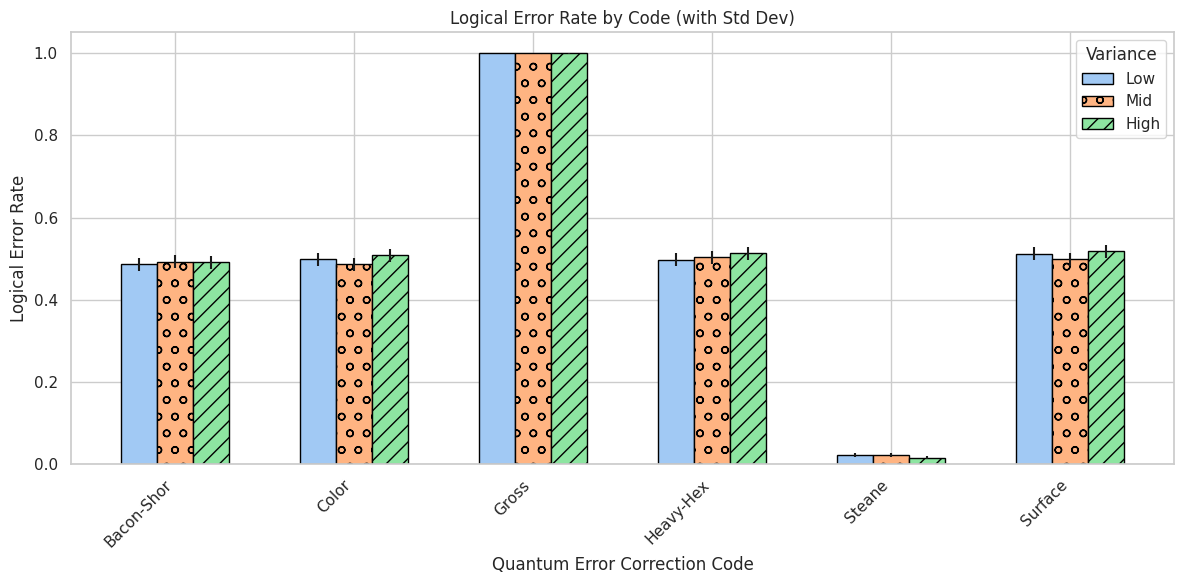

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../experiment_results/Variance_03.07/results.csv")  # Update with the correct file path

# Ensure `backend` is categorical with proper order
backend_order = ["variance_low", "variance_mid", "variance_high"]
df["backend"] = pd.Categorical(df["backend"], categories=backend_order, ordered=True)

# Format code names
def format_code(code):
    code = code.capitalize()
    if code == "Bacon":
        return "Bacon-Shor"
    elif code == "Hh":
        return "Heavy-Hex"
    return code

df["code"] = df["code"].apply(format_code)

# Calculate standard deviation using Bernoulli trial std formula
df["std"] = np.sqrt(df["logical_error_rate"] * (1 - df["logical_error_rate"]) / df["num_samples"])

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Unique codes sorted
codes = sorted(df["code"].unique())
x = np.arange(len(codes))
bar_width = 0.2

# Color palette
palette = sns.color_palette("pastel", n_colors=3)
hatches = ["", "o", "//"]

# Plot bars for each backend
for i, backend in enumerate(backend_order):
    subset = df[df["backend"] == backend]
    means = []
    stds = []

    for code in codes:
        row = subset[subset["code"] == code]
        if not row.empty:
            means.append(row["logical_error_rate"].values[0])
            stds.append(row["std"].values[0])
        else:
            means.append(0)
            stds.append(0)

    plt.bar(
        x + i * bar_width,
        means,
        yerr=stds,
        width=bar_width,
        color=palette[i],
        hatch=hatches[i],
        edgecolor="black",
        label=backend.replace("variance_", "").capitalize()
    )

# Axes and labels
plt.xticks(x + bar_width, codes, rotation=45, ha="right")
plt.xlabel("Quantum Error Correction Code")
plt.ylabel("Logical Error Rate")
plt.title("Logical Error Rate by Code (with Std Dev)")
plt.legend(title="Variance")
plt.tight_layout()

# Save / Show
plt.savefig("../data/variance/varience_new.png")
plt.show()


# 3. Plot DQC

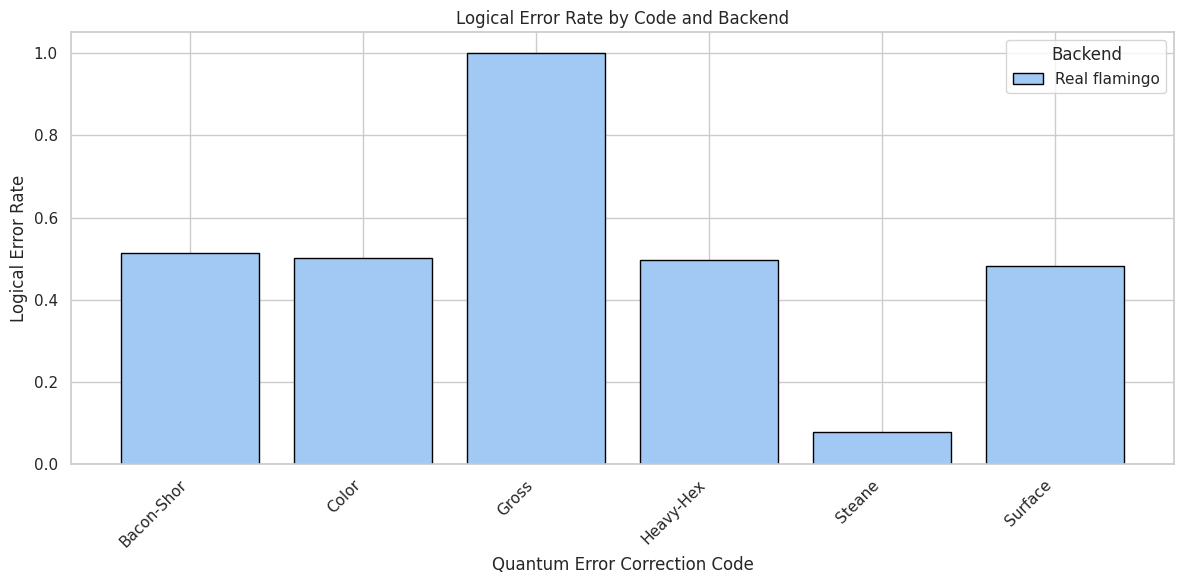

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and concatenate data
df1 = pd.read_csv("../experiment_results/DQC_26.06/results.csv")
df2 = pd.read_csv("../experiment_results/DQC_30.06/results.csv")
df = pd.concat([df1, df2], ignore_index=True)

# Format code names for readability
def format_code(code):
    code = code.lower()
    if code == "bacon":
        return "Bacon-Shor"
    elif code == "hh":
        return "Heavy-Hex"
    return code.capitalize()

df["code"] = df["code"].apply(format_code)

# Determine backend order (set your preferred order if needed)
backends = sorted(df["backend"].dropna().unique())
df["backend"] = pd.Categorical(df["backend"], categories=backends, ordered=True)

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

codes = sorted(df["code"].unique())
x = np.arange(len(codes))
bar_width = 0.8 / len(backends)  # fit all bars

palette = sns.color_palette("pastel", n_colors=len(backends))
hatches = ["", "/", "//", "x", "O", "+"]  # more if needed

# Plot
for i, backend in enumerate(backends):
    subset = df[df["backend"] == backend]
    means = []

    for code in codes:
        row = subset[subset["code"] == code]
        if not row.empty:
            means.append(row["logical_error_rate"].values[0])
        else:
            means.append(0)

    plt.bar(
        x + i * bar_width,
        means,
        width=bar_width,
        color=palette[i % len(palette)],
        hatch=hatches[i % len(hatches)],
        edgecolor="black",
        label=backend.replace("_", " ").capitalize()
    )

# Labels & Title
plt.xticks(x + bar_width * (len(backends) - 1) / 2, codes, rotation=45, ha="right")
plt.xlabel("Quantum Error Correction Code")
plt.ylabel("Logical Error Rate")
plt.title("Logical Error Rate by Code and Backend")
plt.legend(title="Backend")
plt.tight_layout()

# Save or show
#plt.savefig("../data/DQC/dqc.png")
plt.show()



# 4. Routing

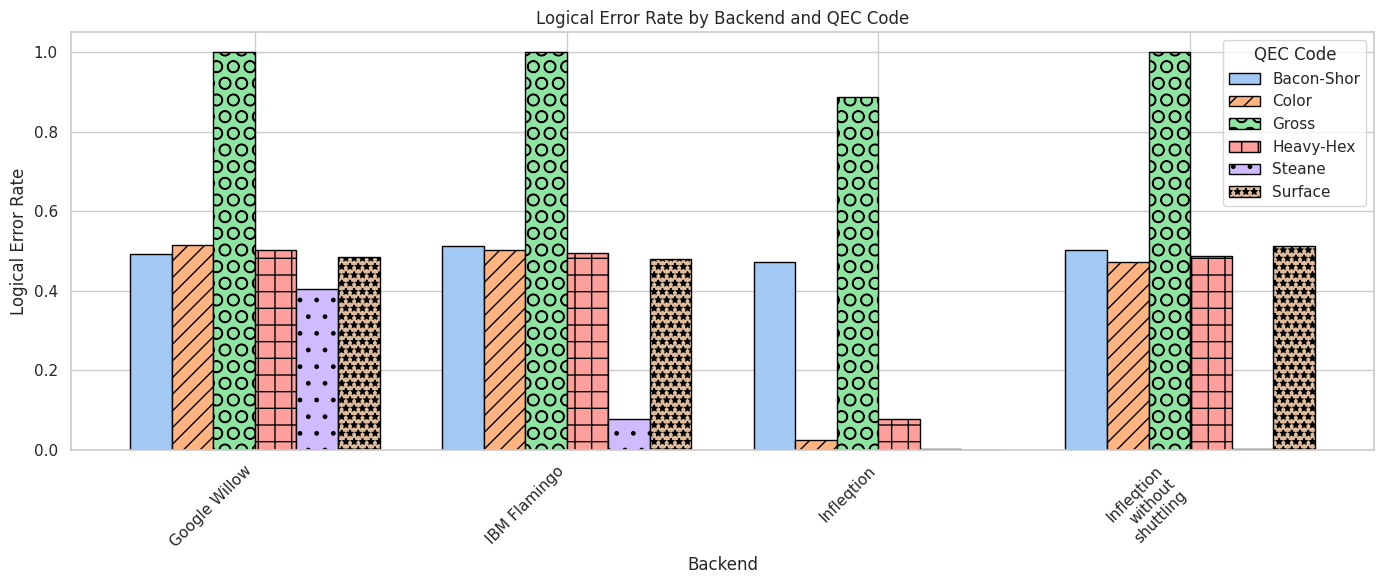

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Load all backend datasets
# -----------------------

# Backend 1 (combined from two files)
df1 = pd.read_csv("../experiment_results/DQC_26.06/results.csv")
df2 = pd.read_csv("../experiment_results/DQC_30.06/results.csv")
df_base = pd.concat([df1, df2], ignore_index=True)
df_base["backend"] = "IBM Flamingo"  # name it manually

# Placeholder for 4 other backends
df_b2 = pd.read_csv("../experiment_results/Willow_07.07/results.csv")
df_b2["backend"] = "Google Willow"

df_b3 = pd.read_csv("../experiment_results/Infleqtion_07.07/results.csv")
df_b3["backend"] = df_b3["backend"].replace({
    "real_infleqtion": "Infleqtion",
    "real_nsinfleqtion": "Infleqtion\nwithout\nshuttling"
})


# Combine all
df = pd.concat([df_base, df_b2, df_b3], ignore_index=True)

# -----------------------
# Format and preprocess
# -----------------------

# Clean code names
def format_code(code):
    code = code.lower()
    if code == "bacon":
        return "Bacon-Shor"
    elif code == "hh":
        return "Heavy-Hex"
    return code.capitalize()

df["code"] = df["code"].apply(format_code)

# Sort and format backends and codes
backends = sorted(df["backend"].unique())
codes = sorted(df["code"].unique())

df["backend"] = pd.Categorical(df["backend"], categories=backends, ordered=True)
df["code"] = pd.Categorical(df["code"], categories=codes, ordered=True)

# -----------------------
# Plotting
# -----------------------

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

x = np.arange(len(backends))
bar_width = 0.8 / len(codes)

palette = sns.color_palette("pastel", n_colors=len(codes))
hatches = ["", "//", "O", "+", ".", "**"]  # Add more if needed

# Bars: one group per backend, 6 bars per group (one per code)
for i, code in enumerate(codes):
    means = []
    for backend in backends:
        subset = df[(df["backend"] == backend) & (df["code"] == code)]
        if not subset.empty:
            means.append(subset["logical_error_rate"].values[0])
        else:
            means.append(0)

    plt.bar(
        x + i * bar_width,
        means,
        width=bar_width,
        color=palette[i % len(palette)],
        hatch=hatches[i % len(hatches)],
        edgecolor="black",
        label=code
    )

# Final plot formatting
plt.xticks(x + bar_width * (len(codes) - 1) / 2, backends, rotation=45, ha="right")
plt.xlabel("Backend")
plt.ylabel("Logical Error Rate")
plt.title("Logical Error Rate by Backend and QEC Code")
plt.legend(title="QEC Code")
plt.tight_layout()

# Save or show
#plt.savefig("../data/technology/technologies.pdf", format="pdf")
plt.show()


# 5. Additional errors - better in table

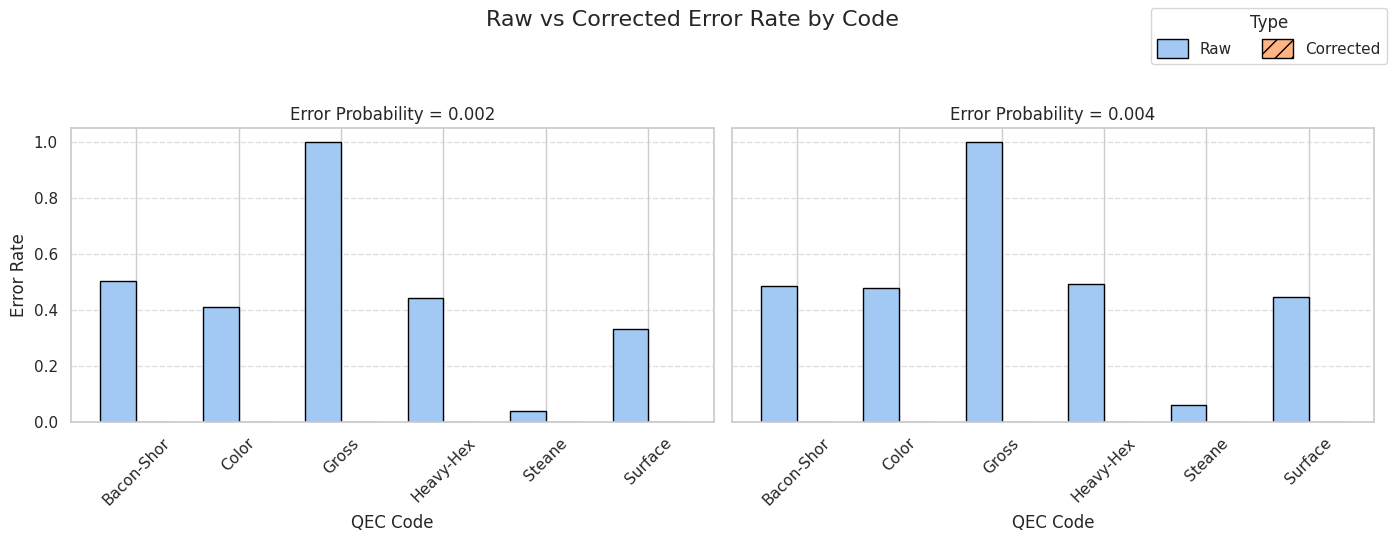

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../experiment_results/Accumulate_errors_07.07_fixed/results.csv")

# Format code names
def format_code(code):
    code = code.lower()
    if code == "bacon":
        return "Bacon-Shor"
    elif code == "hh":
        return "Heavy-Hex"
    return code.capitalize()

df["code"] = df["code"].apply(format_code)

# Ensure consistent ordering
codes = sorted(df["code"].unique())
error_probs = sorted(df["error_probability"].unique())
n_probs = len(error_probs)

# Plot styling setup
bar_width = 0.35
palette = sns.color_palette("pastel", n_colors=2)
hatches = ['', '//']
categories = ["Raw", "Corrected"]

fig, axes = plt.subplots(1, n_probs, figsize=(7 * n_probs, 5), sharey=True)
if n_probs == 1:
    axes = [axes]  # make iterable if single plot

for ax, error_p in zip(axes, error_probs):
    subset = df[df["error_probability"] == error_p]
    x = np.arange(len(codes))

    raw_vals = []
    corrected_vals = []

    for code in codes:
        code_data = subset[subset["code"] == code]
        if not code_data.empty:
            raw_vals.append(code_data["raw_error_rate"].mean())
            corrected_vals.append(code_data["corrected_error_rate"].mean())
        else:
            raw_vals.append(0)
            corrected_vals.append(0)

    ax.bar(
        x - bar_width/2,
        raw_vals,
        width=bar_width,
        color=palette[0],
        edgecolor="black",
        hatch=hatches[0],
        label="Raw" if error_p == error_probs[0] else None
    )
    ax.bar(
        x + bar_width/2,
        corrected_vals,
        width=bar_width,
        color=palette[1],
        edgecolor="black",
        hatch=hatches[1],
        label="Corrected" if error_p == error_probs[0] else None
    )

    ax.set_xticks(x)
    ax.set_xticklabels(codes, rotation=45)
    ax.set_title(f"Error Probability = {error_p}")
    ax.set_xlabel("QEC Code")
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylabel("Error Rate")

# Legend outside the plot area
handles = [
    plt.Rectangle((0, 0), 1, 1, facecolor=palette[i], edgecolor="black", hatch=hatches[i])
    for i in range(2)
]
fig.legend(handles, categories, title="Type", loc="upper right", ncol=2, handleheight=1.5)

fig.suptitle("Raw vs Corrected Error Rate by Code", fontsize=16, y=1.08)
plt.tight_layout()
# plt.savefig("raw_vs_corrected_error_rates_faceted.png", bbox_inches='tight')
plt.show()
